# # DIDS Raw Data Inspection
# This notebook performs a comprehensive inspection of the raw DIDS dataset.

In [1]:
# Imports and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Plot style
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

In [2]:
# Define Helper Function for Column Analysis
def analyze_column(df, column_name):
    """Analyze a single column and return summary statistics"""
    col_data = df[column_name]
    
    print(f"\n{'='*50}")
    print(f"ANALYSIS FOR COLUMN: {column_name}")
    print(f"{'='*50}")
    
    # Basic info
    print(f"Data type: {col_data.dtype}")
    print(f"Total values: {len(col_data):,}")
    print(f"Non-null values: {col_data.count():,}")
    print(f"Null values: {col_data.isnull().sum():,}")
    print(f"Unique values: {col_data.nunique():,}")
    
    # Sample values
    print(f"\nSample values:")
    sample_values = col_data.dropna().unique()[:10]
    for i, val in enumerate(sample_values, 1):
        print(f"  {i}. {val}")
    
    # Value counts
    if col_data.dtype == 'object' and col_data.nunique() < 50:
        print(f"\nValue counts (top 10):")
        value_counts = col_data.value_counts().head(10)
        for val, count in value_counts.items():
            print(f"  {val}: {count:,} ({count/len(col_data)*100:.1f}%)")
    
    # Numeric stats
    if pd.api.types.is_numeric_dtype(col_data):
        print(f"\nNumeric statistics:")
        print(f"  Min: {col_data.min()}")
        print(f"  Max: {col_data.max()}")
        print(f"  Mean: {col_data.mean():.2f}")
        print(f"  Median: {col_data.median():.2f}")
        print(f"  Std: {col_data.std():.2f}")
    
    # Date stats
    if pd.api.types.is_datetime64_any_dtype(col_data):
        print(f"\nDate statistics:")
        print(f"  Min date: {col_data.min()}")
        print(f"  Max date: {col_data.max()}")
        print(f"  Date range: {col_data.max() - col_data.min()}")


In [3]:
# Load Raw CSV
print("=== DIDS RAW DATA INSPECTION ===")
data_path = Path('/Users/rosstaylor/Downloads/Research Project/Code Folder/nhs-diagnostics-dids-eda/nhs-diagnostics-dids-eda/nhs-dids-explorer/data/raw/2024_01.csv')

print(f"File exists: {data_path.exists()}")
if not data_path.exists():
    raise FileNotFoundError("Raw data file not found!")

print(f"File size: {data_path.stat().st_size / (1024*1024):.1f} MB")

# Load with no headers
df = pd.read_csv(data_path, header=None, low_memory=False)

# Assign correct column names manually
df.columns = [
    "DidDate1", "DidDate2", "DidDate3", "DidDate4", "DidEthcat", "IcEthcatDesc",
    "DidGenderCode", "IcGenderDesc", "DidNhsnumStat", "IcNhsnumStatDesc", "IcNhsnumSupp",
    "DidReferOrgcode", "IcReferOrgname", "DidReggpPraccode", "IcReggpPracname",
    "DidSnomedctCode", "IcSnomedctDesc", "IcCcgcode", "IcCcgname", "IcPctcode", "IcPctname",
    "IcReftypeDesc", "IcLsoa", "IcMsoa", "IcMorphDesc", "IcMorphologyId", "IcFetalDesc",
    "IcFetalId", "IcSubModalityDesc", "IcSubModalityId", "IcSubSysDesc", "IcSubSysId",
    "IcCancerDesc", "IcModalityDesc", "Der_Age_at_Date_of_Test", "Der_Financial_Year",
    "Der_Financial_Month", "Der_Activity_Month", "PseudoNumber", "IcSitename", "IcSitecode",
    "IcSubmitOrgcode", "IcSubmitOrgname", "IcSubSyscompDesc", "IcSubSyscompId", "UDALFileID"
]

print("Data loaded successfully.")
print(f"Shape: {df.shape}")



=== DIDS RAW DATA INSPECTION ===
File exists: True
File size: 245.4 MB
Data loaded successfully.
Shape: (366776, 46)


In [4]:
# Basic Overview
print("=== BASIC DATA OVERVIEW ===")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024*1024):.1f} MB")
df.head(5)


=== BASIC DATA OVERVIEW ===
Number of rows: 366,776
Number of columns: 46
Memory usage: 830.0 MB


,DidDate1,DidDate2,DidDate3,DidDate4,DidEthcat,IcEthcatDesc,DidGenderCode,IcGenderDesc,DidNhsnumStat,IcNhsnumStatDesc,IcNhsnumSupp,DidReferOrgcode,IcReferOrgname,DidReggpPraccode,IcReggpPracname,DidSnomedctCode,IcSnomedctDesc,IcCcgcode,IcCcgname,IcPctcode,IcPctname,IcReftypeDesc,IcLsoa,IcMsoa,IcMorphDesc,IcMorphologyId,IcFetalDesc,IcFetalId,IcSubModalityDesc,IcSubModalityId,IcSubSysDesc,IcSubSysId,IcCancerDesc,IcModalityDesc,Der_Age_at_Date_of_Test,Der_Financial_Year,Der_Financial_Month,Der_Activity_Month,PseudoNumber,IcSitename,IcSitecode,IcSubmitOrgcode,IcSubmitOrgname,IcSubSyscompDesc,IcSubSyscompId,UDALFileID
0,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-02 00:00:00.0000000,A,White - British,2,Female,1.0,Number present and verified,1,RK9,UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST (RK9),L82015,CHACEWATER HEALTH CENTRE (L82015),399208008,Plain chest X-ray (procedure),11N,NHS CORNWALL AND THE ISLES OF SCILLY ICB - 11N,5QP,CORNWALL AND ISLES OF SCILLY PCT,Consultant,E01018817,E02003911,Thoracic structure (body structure),51185008.0,NaN,NaN,Plain radiography (procedure),168537006.0,NaN,NaN,Suspected Lung Cancer - Chest X-ray,XR Chest,59.0,2023/24,202410,202401,1.000246e+11,DERRIFORD HOSPITAL (RK950),RK950,RK9,PLYMOUTH HOSPITALS NHS TRUST (RK9),NaN,NaN,1005306
1,2023-07-26 00:00:00.0000000,2023-07-26 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,A,White - British,2,Female,NaN,NaN,1,RTE,GLOUCESTERSHIRE HOSPITALS NHS FOUNDATION TRUST (RTE),L84006,STAUNTON & CORSE SURGERY (L84006),429915000,Transvaginal ultrasonography of pelvis (procedure),11M,NHS GLOUCESTERSHIRE ICB - 11M,5QH,GLOUCESTERSHIRE PCT,Consultant,E01022270,E02004626,Pelvic structure (body structure),12921003.0,NaN,NaN,Diagnostic ultrasonography (procedure),16310003.0,NaN,NaN,NaN,NaN,61.0,2023/24,202410,202401,1.000536e+11,GLOUCESTERSHIRE ROYAL HOSPITAL (RTE03),RTE03,RTE,GLOUCESTERSHIRE HOSPITALS NHS FOUNDATION TRUST (RTE),NaN,NaN,1005306
2,2024-01-01 00:00:00.0000000,NaN,2024-01-01 00:00:00.0000000,2024-01-02 00:00:00.0000000,Z,Not stated,2,Female,1.0,Number present and verified,1,RNZ,SALISBURY NHS FOUNDATION TRUST (RNZ),J83018,AVENUE SURGERY (J83018),408740001,Radiography of hip (procedure),92G,"NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE ICB - 92G",5QK,WILTSHIRE PCT,Consultant,E01032110,E02006693,NaN,NaN,NaN,NaN,Plain radiography (procedure),168537006.0,NaN,NaN,NaN,NaN,75.0,2023/24,202410,202401,1.000096e+11,SALISBURY DISTRICT HOSPITAL (RNZ02),RNZ02,RNZ,SALISBURY NHS FOUNDATION TRUST (RNZ),NaN,NaN,1005306
3,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-02 00:00:00.0000000,A,White - British,2,Female,1.0,Number present and verified,1,RA7,UNIVERSITY HOSPITALS BRISTOL AND WESTON NHS FOUNDATION TRUST (RA7),L81031,THE ARMADA FAMILY PRACTICE (L81031),268425006,Pelvis X-ray (procedure) (268425006),15C,"NHS BRISTOL, NORTH SOMERSET AND SOUTH GLOUCESTERSHIRE ICB - 15C",5QJ,BRISTOL PCT,Consultant,E01014608,E02003058,Pelvic structure (body structure),12921003.0,NaN,NaN,Plain radiography (procedure),168537006.0,NaN,NaN,NaN,NaN,17.0,2023/24,202410,202401,1.000114e+11,BRISTOL ROYAL INFIRMARY (RA701),RA701,RA7,UNIVERSITY HOSPITALS BRISTOL NHS FOUNDATION TRUST (RA7),NaN,NaN,1005306
4,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,2024-01-01 00:00:00.0000000,A,White - British,1,Male,1.0,Number present and verified,1,R0D,UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST (R0D),J81019,THE BLANDFORD GROUP PRACTICE (J81019),89846007,Orthopantogram (procedure),11J,NHS DORSET ICB - 11J,5QM,DORSET PCT,Not known,E01020435,E02004261,Head structure (body structure),69536005.0,NaN,NaN,Plain radiography (procedure),168537006.0,NaN,NaN,NaN,NaN,58.0,2023/24,202410,202401,1.000387e+11,POOLE HOSPITAL (R0D01),R0D01,R0D,UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST (R0D),Structure of digestive system (body structure),86762007.0,1005306


In [6]:
# Column Information Summary
print("=== COLUMN INFORMATION ===")
print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nData types count:")
print(df.dtypes.value_counts())

column_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

column_info.head()


=== COLUMN INFORMATION ===
Column Names:
 1. DidDate1
 2. DidDate2
 3. DidDate3
 4. DidDate4
 5. DidEthcat
 6. IcEthcatDesc
 7. DidGenderCode
 8. IcGenderDesc
 9. DidNhsnumStat
10. IcNhsnumStatDesc
11. IcNhsnumSupp
12. DidReferOrgcode
13. IcReferOrgname
14. DidReggpPraccode
15. IcReggpPracname
16. DidSnomedctCode
17. IcSnomedctDesc
18. IcCcgcode
19. IcCcgname
20. IcPctcode
21. IcPctname
22. IcReftypeDesc
23. IcLsoa
24. IcMsoa
25. IcMorphDesc
26. IcMorphologyId
27. IcFetalDesc
28. IcFetalId
29. IcSubModalityDesc
30. IcSubModalityId
31. IcSubSysDesc
32. IcSubSysId
33. IcCancerDesc
34. IcModalityDesc
35. Der_Age_at_Date_of_Test
36. Der_Financial_Year
37. Der_Financial_Month
38. Der_Activity_Month
39. PseudoNumber
40. IcSitename
41. IcSitecode
42. IcSubmitOrgcode
43. IcSubmitOrgname
44. IcSubSyscompDesc
45. IcSubSyscompId
46. UDALFileID

Data types count:
object     32
float64     8
int64       6
Name: count, dtype: int64


,Column,Data Type,Non-Null Count,Null Count,Null Percentage
DidDate1,DidDate1,object,309344,57432,15.66
DidDate2,DidDate2,object,336631,30145,8.22
DidDate3,DidDate3,object,366776,0,0.00
DidDate4,DidDate4,object,354133,12643,3.45
DidEthcat,DidEthcat,object,364462,2314,0.63


In [9]:
# Missing Values Analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

print(f"Total missing values: {missing_data.sum():,}")
missing_summary[missing_summary['Missing Count'] > 0].head()


=== MISSING VALUES ANALYSIS ===
Total missing values: 2,746,133


,Column,Missing Count,Missing Percentage
IcSubSysId,IcSubSysId,356449,97.18
IcSubSysDesc,IcSubSysDesc,356449,97.18
IcModalityDesc,IcModalityDesc,272905,74.41
IcCancerDesc,IcCancerDesc,272905,74.41
IcFetalId,IcFetalId,272571,74.32


In [10]:
# Data Type Categorisation
print("=== DATA TYPE CATEGORISATION ===")

# Identify date-like columns
date_columns = []
for col in df.columns[:5]:
    try:
        pd.to_datetime(df[col].iloc[0])
        date_columns.append(col)
    except:
        pass
print("Potential date columns:", date_columns)

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)


=== DATA TYPE CATEGORISATION ===
Potential date columns: ['DidDate1', 'DidDate2', 'DidDate3', 'DidDate4']
Numeric columns: ['DidGenderCode', 'DidNhsnumStat', 'IcNhsnumSupp', 'DidSnomedctCode', 'IcMorphologyId', 'IcFetalId', 'IcSubModalityId', 'IcSubSysId', 'Der_Age_at_Date_of_Test', 'Der_Financial_Month', 'Der_Activity_Month', 'PseudoNumber', 'IcSubSyscompId', 'UDALFileID']
Categorical columns: ['DidDate1', 'DidDate2', 'DidDate3', 'DidDate4', 'DidEthcat', 'IcEthcatDesc', 'IcGenderDesc', 'IcNhsnumStatDesc', 'DidReferOrgcode', 'IcReferOrgname', 'DidReggpPraccode', 'IcReggpPracname', 'IcSnomedctDesc', 'IcCcgcode', 'IcCcgname', 'IcPctcode', 'IcPctname', 'IcReftypeDesc', 'IcLsoa', 'IcMsoa', 'IcMorphDesc', 'IcFetalDesc', 'IcSubModalityDesc', 'IcSubSysDesc', 'IcCancerDesc', 'IcModalityDesc', 'Der_Financial_Year', 'IcSitename', 'IcSitecode', 'IcSubmitOrgcode', 'IcSubmitOrgname', 'IcSubSyscompDesc']


In [11]:
# Detailed Column Analysis 
for col in df.columns[:]:
    analyze_column(df, col)



ANALYSIS FOR COLUMN: DidDate1
Data type: object
Total values: 366,776
Non-null values: 309,344
Null values: 57,432
Unique values: 731

Sample values:
  1. 2024-01-01 00:00:00.0000000
  2. 2023-07-26 00:00:00.0000000
  3. 2023-12-31 00:00:00.0000000
  4. 2023-12-29 00:00:00.0000000
  5. 2023-12-30 00:00:00.0000000
  6. 2023-10-20 00:00:00.0000000
  7. 2023-12-27 00:00:00.0000000
  8. 2023-12-13 00:00:00.0000000
  9. 2023-11-15 00:00:00.0000000
  10. 2023-11-24 00:00:00.0000000

ANALYSIS FOR COLUMN: DidDate2
Data type: object
Total values: 366,776
Non-null values: 336,631
Null values: 30,145
Unique values: 742

Sample values:
  1. 2024-01-01 00:00:00.0000000
  2. 2023-07-26 00:00:00.0000000
  3. 2023-12-31 00:00:00.0000000
  4. 2023-12-29 00:00:00.0000000
  5. 2023-12-30 00:00:00.0000000
  6. 2023-10-20 00:00:00.0000000
  7. 2023-12-27 00:00:00.0000000
  8. 2023-12-13 00:00:00.0000000
  9. 2023-11-15 00:00:00.0000000
  10. 2023-11-27 00:00:00.0000000

ANALYSIS FOR COLUMN: DidDate3
Data 

In [20]:
# Data Quality Checks
print("=== DATA QUALITY ASSESSMENT ===")

duplicate_rows = df.duplicated().sum()
empty_strings = (df == '').sum().sum()
null_strings = (df == 'NULL').sum().sum()

print(f"Duplicate rows: {duplicate_rows:,}")
print(f"Empty strings: {empty_strings:,}")
print(f"'NULL' strings: {null_strings:,}")

df.describe(include=[np.number])


=== DATA QUALITY ASSESSMENT ===
Duplicate rows: 4,363
Empty strings: 0
'NULL' strings: 0


,DidGenderCode,DidNhsnumStat,IcNhsnumSupp,DidSnomedctCode,IcMorphologyId,IcFetalId,IcSubModalityId,IcSubSysId,Der_Age_at_Date_of_Test,Der_Financial_Month,Der_Activity_Month,PseudoNumber,IcSubSyscompId,UDALFileID
count,366776.000000,297585.000000,366776.000000,3.667760e+05,2.926530e+05,9.420500e+04,3.627070e+05,1.032700e+04,366770.000000,366776.0,366776.0,3.666220e+05,1.076040e+05,366776.0
mean,1.584130,1.043887,0.999566,1.233199e+14,5.838469e+07,5.993336e+07,1.140784e+08,2.063524e+08,56.128350,202410.0,202401.0,1.000457e+11,5.556963e+07,1005306.0
std,0.493972,0.341017,0.020816,1.312111e+15,2.492274e+07,7.278116e+06,7.047332e+07,1.677138e+08,22.649864,0.0,0.0,9.678168e+07,5.161838e+07,0.0
min,0.000000,1.000000,0.000000,3.060050e+05,1.292100e+07,5.312001e+07,1.631000e+07,8.306009e+06,0.000000,202410.0,202401.0,1.000000e+11,6.670090e+05,1005306.0
25%,1.000000,1.000000,1.000000,2.414550e+08,5.118501e+07,5.312001e+07,7.747700e+07,8.306009e+06,39.000000,202410.0,202401.0,1.000152e+11,2.151401e+07,1005306.0
50%,2.000000,1.000000,1.000000,3.992080e+08,6.601900e+07,6.168501e+07,1.685370e+08,2.416850e+08,60.000000,202410.0,202401.0,1.000304e+11,2.610700e+07,1005306.0
75%,2.000000,1.000000,1.000000,4.270190e+08,6.601900e+07,6.168501e+07,1.685370e+08,2.416850e+08,75.000000,202410.0,202401.0,1.000442e+11,8.676201e+07,1005306.0
max,9.000000,8.000000,1.000000,1.655020e+16,1.133450e+08,7.675201e+07,7.171930e+08,4.504380e+08,105.000000,202410.0,202401.0,1.008180e+11,3.040350e+08,1005306.0


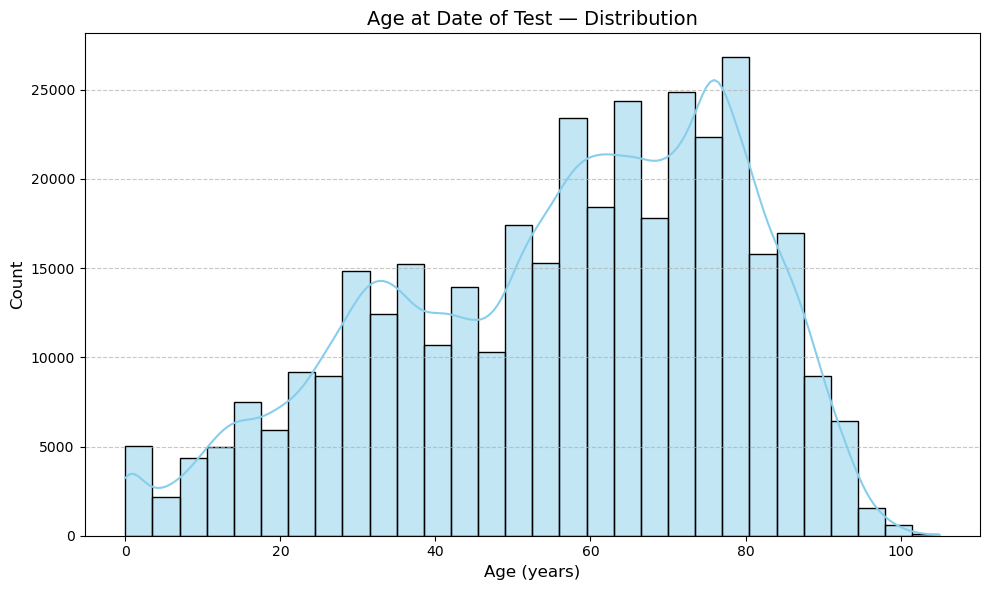

In [12]:


# Drop missing age values
age_data = df['Der_Age_at_Date_of_Test'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=30, kde=True, color='skyblue', edgecolor='black')

# Plot aesthetics
plt.title("Age at Date of Test — Distribution", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


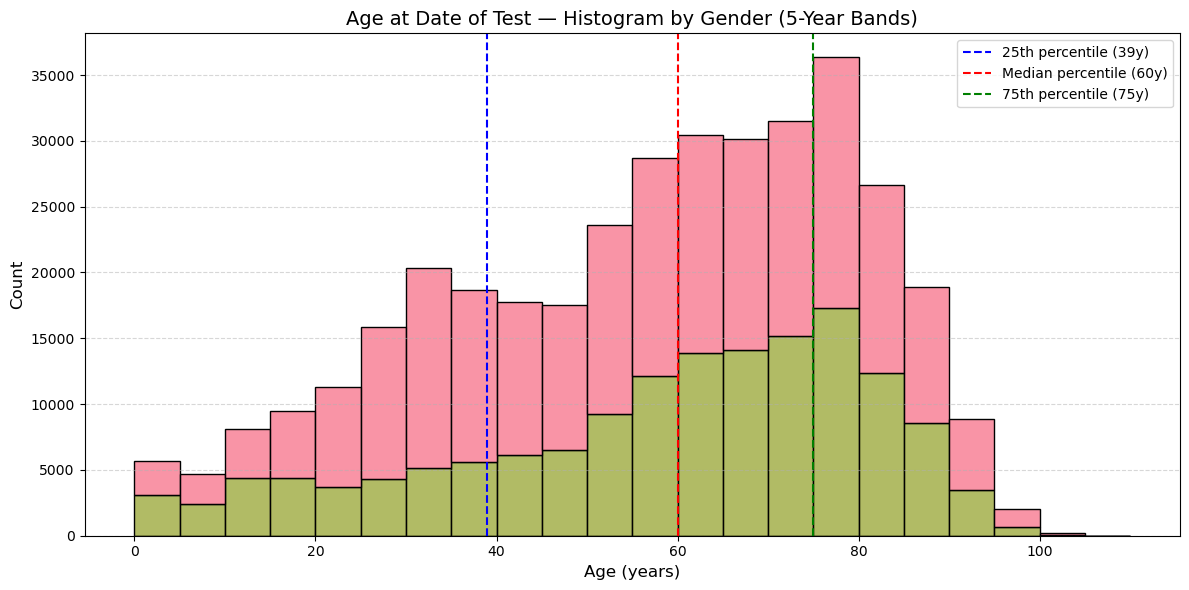

In [13]:


# Ensure valid age and gender entries
df_age_gender = df[['Der_Age_at_Date_of_Test', 'IcGenderDesc']].dropna()
df_age_gender = df_age_gender[df_age_gender['Der_Age_at_Date_of_Test'].between(0, 110)]

# Bin ages into 5-year bands
bin_edges = list(range(0, 111, 5))
df_age_gender['AgeBand'] = pd.cut(df_age_gender['Der_Age_at_Date_of_Test'], bins=bin_edges, right=False)

# Calculate percentiles
p25 = np.percentile(df_age_gender['Der_Age_at_Date_of_Test'], 25)
p50 = np.percentile(df_age_gender['Der_Age_at_Date_of_Test'], 50)
p75 = np.percentile(df_age_gender['Der_Age_at_Date_of_Test'], 75)

# Plot histogram by gender
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_age_gender,
    x='Der_Age_at_Date_of_Test',
    bins=bin_edges,
    hue='IcGenderDesc',
    kde=False,
    palette='husl',
    multiple='stack',
    edgecolor='black'
)

# Add percentile lines
for percentile, label, colour in zip([p25, p50, p75], ['25th', 'Median', '75th'], ['blue', 'red', 'green']):
    plt.axvline(percentile, linestyle='--', color=colour, linewidth=1.5, label=f'{label} percentile ({int(percentile)}y)')

# Plot aesthetics
plt.title("Age at Date of Test — Histogram by Gender (5-Year Bands)", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


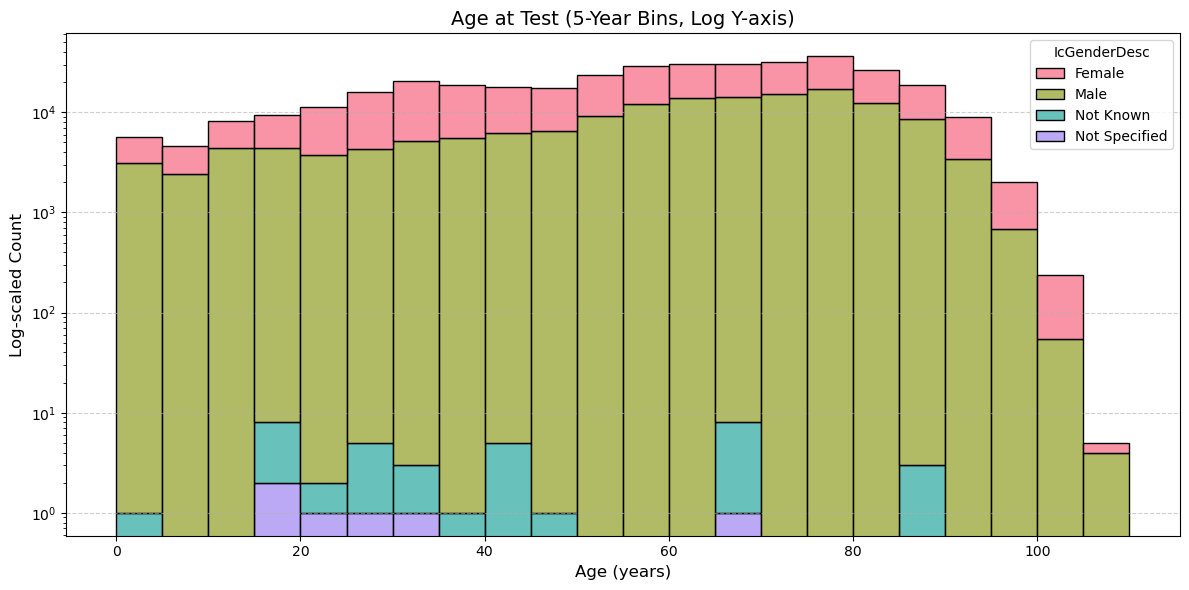

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_age_gender,
    x='Der_Age_at_Date_of_Test',
    bins=bin_edges,
    hue='IcGenderDesc',
    multiple='stack',
    edgecolor='black',
    palette='husl'
)

# Log scale
plt.yscale('log')
plt.title("Age at Test (5-Year Bins, Log Y-axis)", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Log-scaled Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


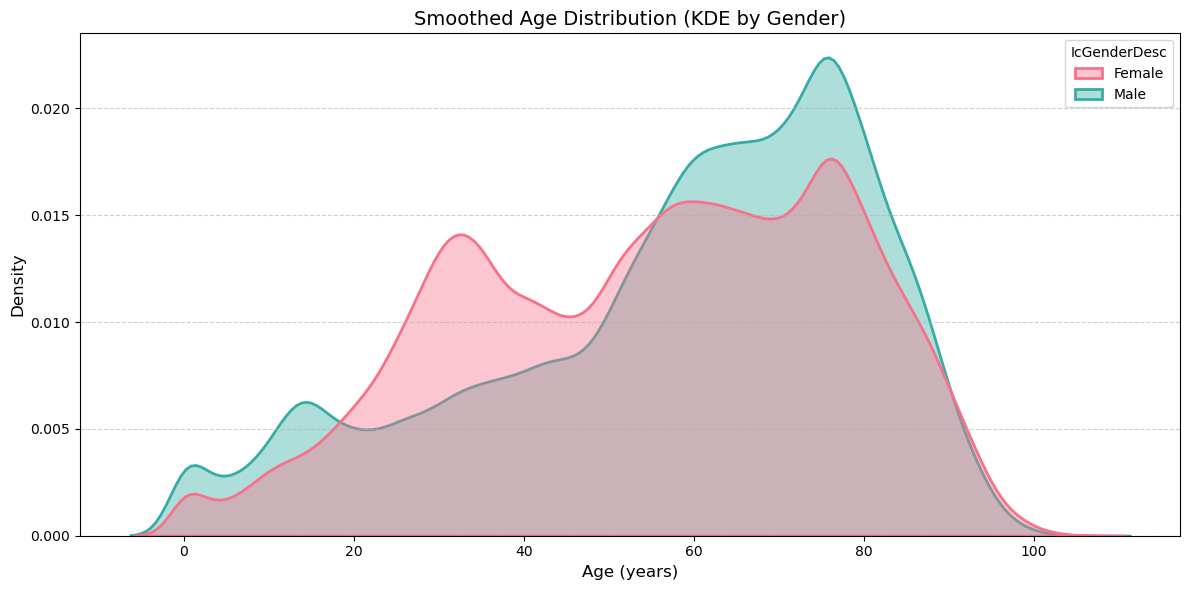

In [22]:


# Filter to include only Male and Female with a more unique dataframe name
df_kde_gender_filtered = df_age_gender[df_age_gender['IcGenderDesc'].isin(['Male', 'Female'])]

plt.figure(figsize=(12, 6))

# KDE plot for Male and Female only
sns.kdeplot(
    data=df_kde_gender_filtered,
    x='Der_Age_at_Date_of_Test',
    hue='IcGenderDesc',
    fill=True,
    common_norm=False,
    alpha=0.4,
    linewidth=2,
    palette='husl'
)

plt.title("Smoothed Age Distribution (KDE by Gender)", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


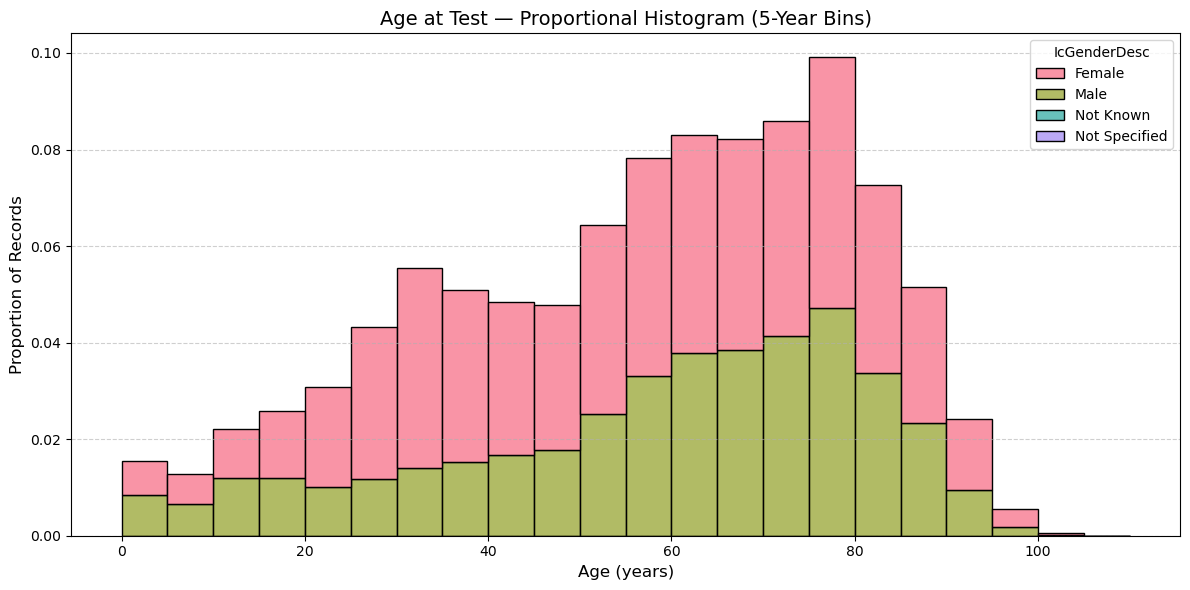

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_age_gender,
    x='Der_Age_at_Date_of_Test',
    bins=bin_edges,
    hue='IcGenderDesc',
    stat='probability',   # shows proportions
    multiple='stack',
    palette='husl',
    edgecolor='black'
)

plt.title("Age at Test — Proportional Histogram (5-Year Bins)", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Proportion of Records", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
# Step 1: Convert columns to datetime
df['DidDate2'] = pd.to_datetime(df['DidDate1'], errors='coerce')
df['DidDate4'] = pd.to_datetime(df['DidDate2'], errors='coerce')

# Step 2: Compute lag in days
df['lag_days'] = (df['DidDate4'] - df['DidDate2']).dt.days

# Step 3: Classify scheduling type
df['likely_elective'] = df['lag_days'].apply(lambda x: 'Yes' if x >= 3 else ('No' if pd.notnull(x) else np.nan))


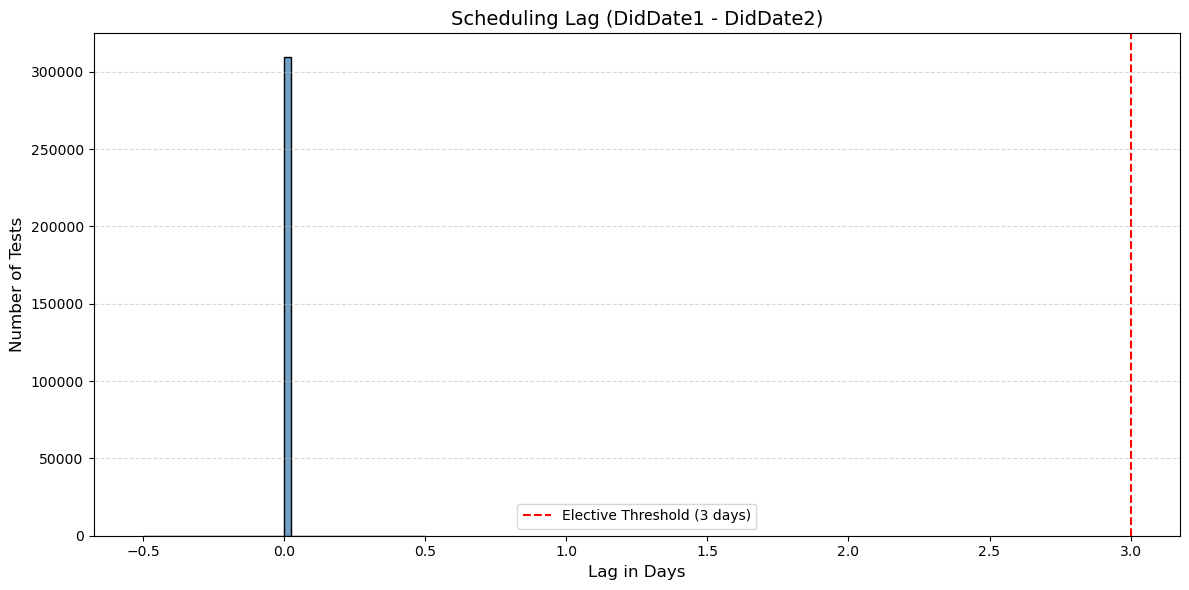

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['lag_days'].dropna(), bins=40, kde=False, color='steelblue', edgecolor='black')
plt.axvline(3, color='red', linestyle='--', label='Elective Threshold (3 days)')
plt.title("Scheduling Lag (DidDate1 - DidDate2)", fontsize=14)
plt.xlabel("Lag in Days", fontsize=12)
plt.ylabel("Number of Tests", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
summary = df['likely_elective'].value_counts(dropna=False).reset_index()
summary.columns = ['Likely Elective?', 'Count']
summary['Percentage'] = (summary['Count'] / summary['Count'].sum() * 100).round(1)
summary


,Likely Elective?,Count,Percentage
0,No,309344,84.3
1,NaN,57432,15.7


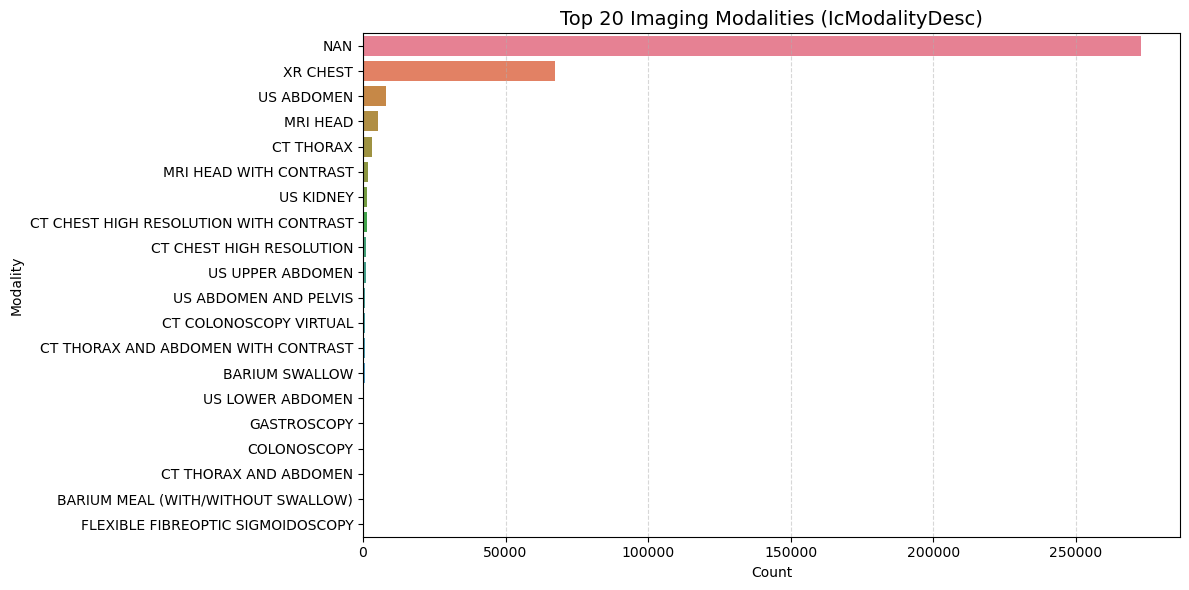

In [27]:
# Clean columns to ensure uniform labels
df['IcModalityDesc_clean'] = df['IcModalityDesc'].astype(str).str.strip().str.upper()
df['IcSubModalityDesc_clean'] = df['IcSubModalityDesc'].astype(str).str.strip().str.title()

# ---- Plot 1: IcModalityDesc (Top-Level) ----
plt.figure(figsize=(12, 6))
modality_counts = df['IcModalityDesc_clean'].value_counts().head(20)

sns.barplot(
    y=modality_counts.index,
    x=modality_counts.values,
    palette='husl'
)
plt.title("Top 20 Imaging Modalities (IcModalityDesc)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Modality")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


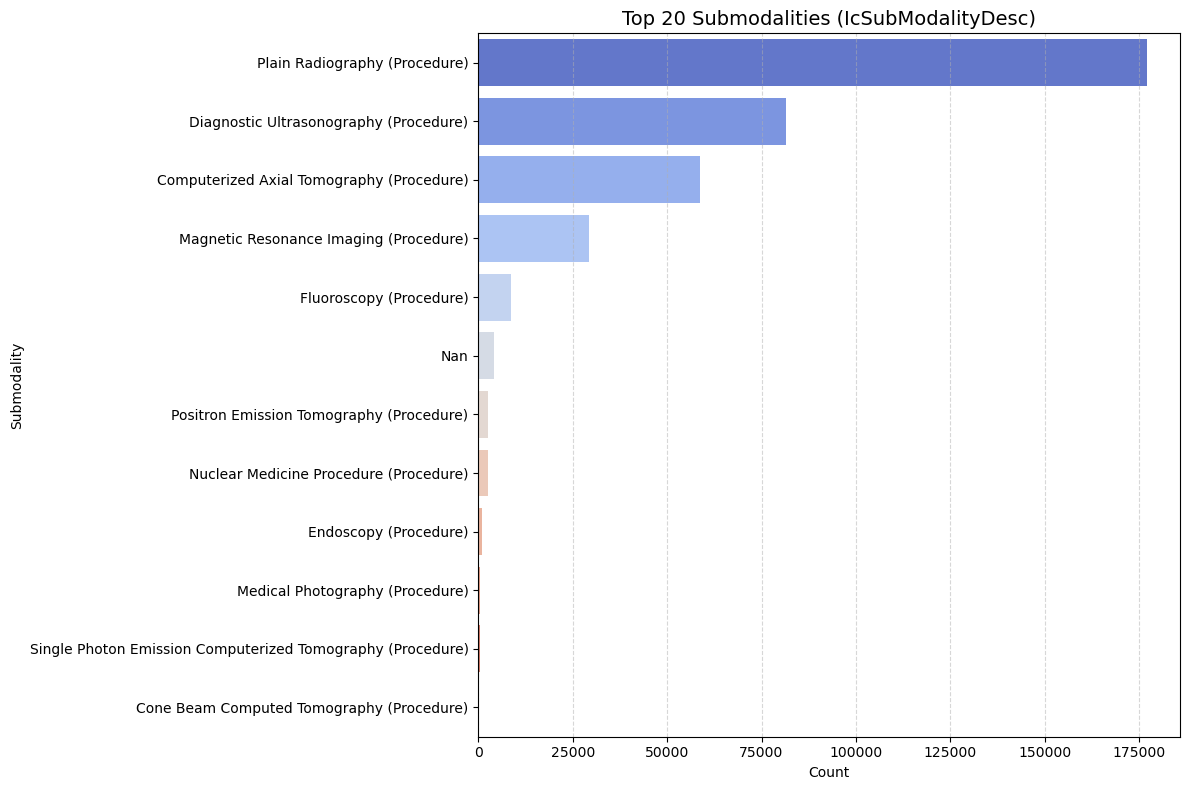

In [28]:
# ---- Plot 2: IcSubModalityDesc (Detailed) ----
plt.figure(figsize=(12, 8))
submodality_counts = df['IcSubModalityDesc_clean'].value_counts().head(20)

sns.barplot(
    y=submodality_counts.index,
    x=submodality_counts.values,
    palette='coolwarm'
)
plt.title("Top 20 Submodalities (IcSubModalityDesc)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Submodality")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


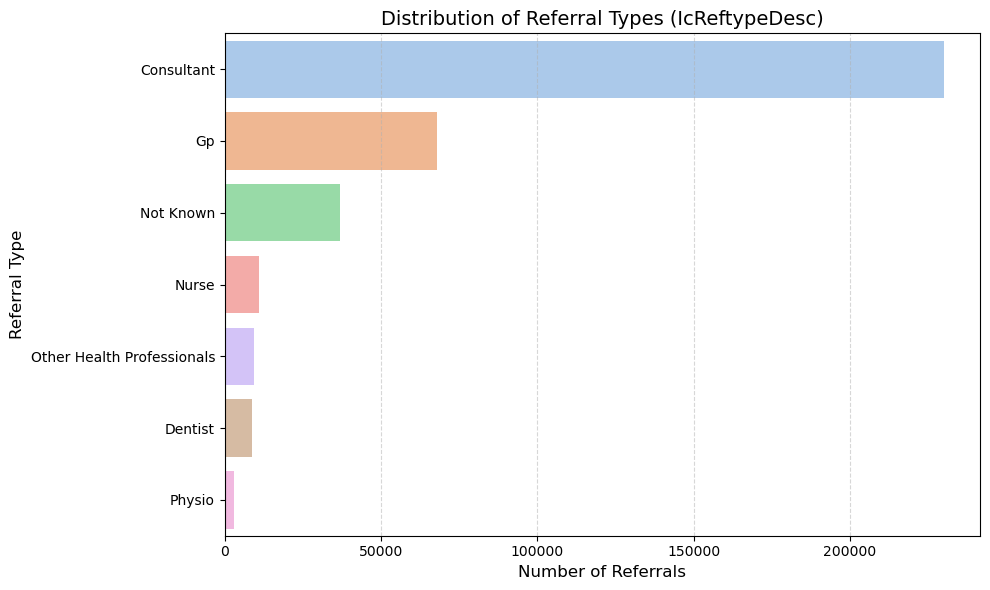

In [38]:



# Clean and standardise the column
df['IcReftypeDesc_clean'] = df['IcReftypeDesc'].astype(str).str.strip().str.title()

# Count the top referrer types
reftype_counts = df['IcReftypeDesc_clean'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    y=reftype_counts.index,
    x=reftype_counts.values,
    palette='pastel'
)

plt.title("Distribution of Referral Types (IcReftypeDesc)", fontsize=14)
plt.xlabel("Number of Referrals", fontsize=12)
plt.ylabel("Referral Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [29]:
# Step 1: Clean age and define age bands
df['age_clean'] = pd.to_numeric(df['Der_Age_at_Date_of_Test'], errors='coerce')

# Create 5-year age bands
age_bins = list(range(0, 111, 5)) + [150]  # catch 110+
age_labels = [f"{i}-{i+4}" for i in range(0, 110, 5)] + ["110+"]

df['age_band'] = pd.cut(df['age_clean'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Split dataset into cancer and non-cancer
cancer_df = df[df['IcCancerDesc'].notnull()]
non_cancer_df = df[df['IcCancerDesc'].isnull()]

In [30]:
def summarise_by_age(df, label):
    total = len(df)
    over_55 = df[df['age_clean'] >= 55].shape[0]
    under_55 = df[df['age_clean'] < 55].shape[0]

    band_counts = df['age_band'].value_counts().sort_index()
    band_df = band_counts.reset_index()
    band_df.columns = ['Age Band', 'Count']
    band_df['Group'] = label
    band_df['Over 55?'] = band_df['Age Band'].apply(lambda x: 'Over 55' if str(x) >= '55-59' else 'Under 55')

    return {
        'summary': {
            'Group': label,
            'Total': total,
            'Over 55': over_55,
            'Under 55': under_55
        },
        'band_df': band_df
    }


In [31]:
cancer_stats = summarise_by_age(cancer_df, 'Cancer')
non_cancer_stats = summarise_by_age(non_cancer_df, 'Non-Cancer')

# Combine into one DataFrame for age bands
age_band_counts = pd.concat([cancer_stats['band_df'], non_cancer_stats['band_df']], ignore_index=True)

# Show overall summary
overall_summary = pd.DataFrame([cancer_stats['summary'], non_cancer_stats['summary']])


In [32]:
print("=== Overall Age Group Summary ===")
print(overall_summary)

print("\n=== 5-Year Age Band Breakdown ===")
print(age_band_counts.pivot(index='Age Band', columns='Group', values='Count').fillna(0).astype(int))


=== Overall Age Group Summary ===
        Group   Total  Over 55  Under 55
0      Cancer   93871    63379     30491
1  Non-Cancer  272905   150484    122416

=== 5-Year Age Band Breakdown ===
Group     Cancer  Non-Cancer
Age Band                    
0-4         2130        3519
5-9          944        3711
10-14        940        7173
15-19       1392        8048
20-24       1831        9432
25-29       2324       13548
30-34       3121       17244
35-39       3693       14941
40-44       4010       13759
45-49       4165       13381
50-54       5941       17660
55-59       7695       21005
60-64       8430       22031
65-69       8462       21680
70-74       9122       22419
75-79      10855       25495
80-84       8481       18144
85-89       6399       12512
90-94       3124        5755
95-99        741        1272
100-104       68         168
105-109        2           3
110+           0           0


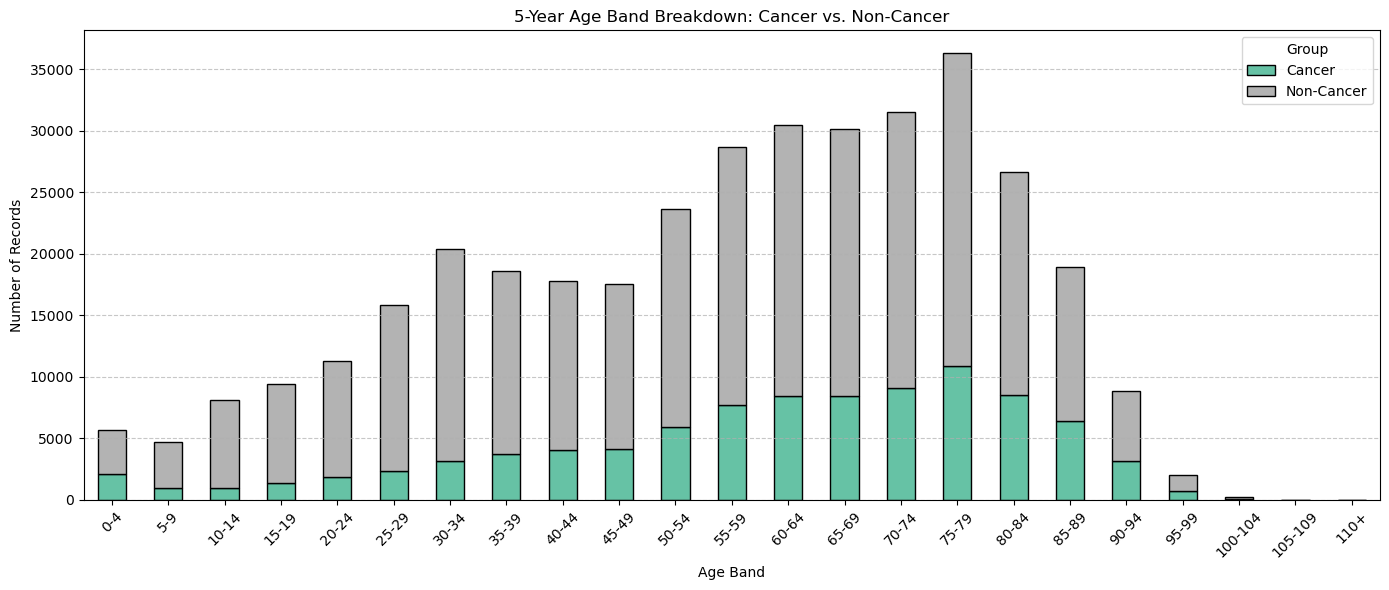

In [33]:
cancer_stats = summarise_by_age(cancer_df, 'Cancer')
non_cancer_stats = summarise_by_age(non_cancer_df, 'Non-Cancer')
age_band_counts = pd.concat([cancer_stats['band_df'], non_cancer_stats['band_df']], ignore_index=True)
pivot_counts = age_band_counts.pivot(index='Age Band', columns='Group', values='Count').fillna(0)

# === Step 6: Plot stacked histogram ===
pivot_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='Set2',
    edgecolor='black'
)
plt.title("5-Year Age Band Breakdown: Cancer vs. Non-Cancer")
plt.ylabel("Number of Records")
plt.xlabel("Age Band")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [37]:
# Clean and band age column
df['age_clean'] = pd.to_numeric(df['Der_Age_at_Date_of_Test'], errors='coerce')
age_bins = list(range(0, 111, 5)) + [150]
age_labels = [f"{i}-{i+4}" for i in range(0, 110, 5)] + ["110+"]
df['age_band'] = pd.cut(df['age_clean'], bins=age_bins, labels=age_labels, right=False)

# Columns to summarise
cols_to_summarise = {
    'IcSnomedctDesc': 'SNOMED Procedure',
    'IcReftypeDesc': 'Referral Type',
    'IcModalityDesc': 'Modality'
}

summary_tables = {}

for col, label in cols_to_summarise.items():
    print(f"\n=== Top 25 {label} by Age Band with Totals and Row % ===")

    # Step 1: Group and get top 25 items
    grouped = df.groupby(['age_band', col]).size().reset_index(name='Count')
    top25_values = grouped.groupby(col)['Count'].sum().nlargest(25).index
    top25_df = grouped[grouped[col].isin(top25_values)]

    # Step 2: Pivot table (raw counts)
    pivot_counts = top25_df.pivot_table(
        index=col,
        columns='age_band',
        values='Count',
        aggfunc='sum',
        fill_value=0
    )

    # Step 3: Add total columns
    pivot_counts['Total'] = pivot_counts.sum(axis=1)
    grand_total = pivot_counts['Total'].sum()
    pivot_counts['% of Top 25'] = (pivot_counts['Total'] / grand_total * 100).round(1)

    # Step 4: Sort by total
    pivot_counts = pivot_counts.sort_values(by='Total', ascending=False)

    # Step 5: Row % distribution across age bands
    row_percent = pivot_counts.iloc[:, :-2].div(pivot_counts['Total'], axis=0).round(3) * 100
    row_percent.index = [f"{idx} %" for idx in pivot_counts.index]

    # Step 6: Interleave raw + % rows
    interleaved = pd.DataFrame()
    for i in range(len(pivot_counts)):
        interleaved = pd.concat([
            interleaved,
            pivot_counts.iloc[[i]],
            row_percent.iloc[[i]]
        ])

    # Step 7: Add NOT COUNTED and TOTAL rows
    ageband_totals = df.groupby('age_band').size()
    top25_totals = pivot_counts.drop(columns=['Total', '% of Top 25']).sum()
    not_counted_raw = ageband_totals - top25_totals
    not_counted_row = pd.DataFrame([list(not_counted_raw) + [not_counted_raw.sum(), (not_counted_raw.sum() / grand_total * 100).round(1)]],
                                   index=["Other (not in top 25)"],
                                   columns=pivot_counts.columns)

    total_row = pd.DataFrame([list(top25_totals) + [grand_total, 100.0]],
                              index=["Total (Top 25 only)"],
                              columns=pivot_counts.columns)

    # Step 8: Final table
    final_table = pd.concat([interleaved, not_counted_row, total_row])

    # Step 9: Store and display
    summary_tables[col] = final_table
    display(
        final_table.style
        .set_caption(f"{label} – Top 25 Items by Age Band with Row %, Totals, and Not Counted Rows")
        .format("{:,.1f}")
        .background_gradient(axis=1, cmap="Greens")
        .set_table_styles([
            {"selector": "caption", "props": [("caption-side", "top"), ("font-weight", "bold"), ("font-size", "16px")]}
        ])
    )



=== Top 25 SNOMED Procedure by Age Band with Totals and Row % ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+,Total,% of Top 25
Plain chest X-ray (procedure),796.0,275.0,288.0,508.0,755.0,910.0,"1,211.0","1,505.0","1,589.0","1,710.0","2,526.0","3,295.0","3,747.0","3,703.0","4,148.0","5,246.0","4,256.0","3,444.0","1,844.0",496.0,31.0,1.0,0.0,"42,284.0",26.4
Plain chest X-ray (procedure) %,1.9,0.7,0.7,1.2,1.8,2.2,2.9,3.6,3.8,4.0,6.0,7.8,8.9,8.8,9.8,12.4,10.1,8.1,4.4,1.2,0.1,0.0,0.0,nan,nan
Plain chest X-ray (procedure) (399208008),950.0,294.0,225.0,335.0,444.0,587.0,800.0,933.0,"1,056.0","1,115.0","1,491.0","2,027.0","2,141.0","2,227.0","2,324.0","2,818.0","2,272.0","1,890.0",891.0,182.0,33.0,1.0,0.0,"25,036.0",15.6
Plain chest X-ray (procedure) (399208008) %,3.8,1.2,0.9,1.3,1.8,2.3,3.2,3.7,4.2,4.5,6.0,8.1,8.6,8.9,9.3,11.3,9.1,7.5,3.6,0.7,0.1,0.0,0.0,nan,nan
Computed tomography of entire head (procedure),45.0,43.0,51.0,123.0,147.0,180.0,202.0,244.0,282.0,243.0,406.0,447.0,577.0,623.0,842.0,"1,203.0","1,331.0","1,309.0",759.0,208.0,16.0,0.0,0.0,"9,281.0",5.8
Computed tomography of entire head (procedure) %,0.5,0.5,0.5,1.3,1.6,1.9,2.2,2.6,3.0,2.6,4.4,4.8,6.2,6.7,9.1,13.0,14.3,14.1,8.2,2.2,0.2,0.0,0.0,nan,nan
Ultrasonography of abdomen (procedure),46.0,72.0,84.0,127.0,165.0,238.0,283.0,350.0,375.0,329.0,488.0,521.0,585.0,492.0,406.0,390.0,251.0,175.0,70.0,13.0,1.0,0.0,0.0,"5,461.0",3.4
Ultrasonography of abdomen (procedure) %,0.8,1.3,1.5,2.3,3.0,4.4,5.2,6.4,6.9,6.0,8.9,9.5,10.7,9.0,7.4,7.1,4.6,3.2,1.3,0.2,0.0,0.0,0.0,nan,nan
Computed tomography of entire head (procedure) (408754009),80.0,36.0,37.0,104.0,125.0,129.0,155.0,157.0,171.0,181.0,234.0,321.0,348.0,347.0,391.0,689.0,728.0,690.0,383.0,91.0,11.0,1.0,0.0,"5,409.0",3.4
Computed tomography of entire head (procedure) (408754009) %,1.5,0.7,0.7,1.9,2.3,2.4,2.9,2.9,3.2,3.3,4.3,5.9,6.4,6.4,7.2,12.7,13.5,12.8,7.1,1.7,0.2,0.0,0.0,nan,nan



=== Top 25 Referral Type by Age Band with Totals and Row % ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+,Total,% of Top 25
Consultant,"4,752.0","2,987.0","4,884.0","5,764.0","6,108.0","8,025.0","10,259.0","10,174.0","10,370.0","10,483.0","14,337.0","17,657.0","18,931.0","19,286.0","20,622.0","24,288.0","18,501.0","14,000.0","6,873.0","1,583.0",191.0,4.0,0.0,"230,079.0",62.7
Consultant %,2.1,1.3,2.1,2.5,2.7,3.5,4.5,4.4,4.5,4.6,6.2,7.7,8.2,8.4,9.0,10.6,8.0,6.1,3.0,0.7,0.1,0.0,0.0,nan,nan
GP,190.0,236.0,454.0,"1,185.0","2,150.0","3,295.0","4,148.0","4,014.0","3,873.0","3,890.0","5,255.0","6,348.0","6,593.0","6,157.0","6,234.0","6,588.0","4,230.0","2,198.0",790.0,137.0,20.0,0.0,0.0,"67,985.0",18.5
GP %,0.3,0.3,0.7,1.7,3.2,4.8,6.1,5.9,5.7,5.7,7.7,9.3,9.7,9.1,9.2,9.7,6.2,3.2,1.2,0.2,0.0,0.0,0.0,nan,nan
Not known,331.0,524.0,"1,027.0","1,066.0","1,379.0","1,824.0","2,233.0","1,960.0","1,997.0","1,911.0","2,457.0","2,816.0","3,060.0","2,908.0","2,868.0","3,386.0","2,415.0","1,655.0",743.0,180.0,11.0,0.0,0.0,"36,751.0",10.0
Not known %,0.9,1.4,2.8,2.9,3.8,5.0,6.1,5.3,5.4,5.2,6.7,7.7,8.3,7.9,7.8,9.2,6.6,4.5,2.0,0.5,0.0,0.0,0.0,nan,nan
Nurse,121.0,315.0,776.0,560.0,553.0,769.0,"1,026.0",813.0,589.0,550.0,599.0,715.0,701.0,700.0,651.0,707.0,442.0,271.0,110.0,22.0,1.0,0.0,0.0,"10,991.0",3.0
Nurse %,1.1,2.9,7.1,5.1,5.0,7.0,9.3,7.4,5.4,5.0,5.4,6.5,6.4,6.4,5.9,6.4,4.0,2.5,1.0,0.2,0.0,0.0,0.0,nan,nan
Other health professionals,104.0,31.0,79.0,256.0,676.0,"1,467.0","2,051.0","1,087.0",427.0,236.0,297.0,384.0,378.0,416.0,363.0,434.0,282.0,198.0,72.0,25.0,6.0,1.0,0.0,"9,270.0",2.5
Other health professionals %,1.1,0.3,0.9,2.8,7.3,15.8,22.1,11.7,4.6,2.5,3.2,4.1,4.1,4.5,3.9,4.7,3.0,2.1,0.8,0.3,0.1,0.0,0.0,nan,nan



=== Top 25 Modality by Age Band with Totals and Row % ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+,Total,% of Top 25
XR Chest,"1,746.0",569.0,513.0,843.0,"1,199.0","1,497.0","2,011.0","2,438.0","2,645.0","2,825.0","4,017.0","5,322.0","5,888.0","5,930.0","6,472.0","8,064.0","6,528.0","5,334.0","2,735.0",678.0,64.0,2.0,0.0,"67,320.0",71.7
XR Chest %,2.6,0.8,0.8,1.3,1.8,2.2,3.0,3.6,3.9,4.2,6.0,7.9,8.7,8.8,9.6,12.0,9.7,7.9,4.1,1.0,0.1,0.0,0.0,nan,nan
US Abdomen,62.0,94.0,115.0,181.0,243.0,352.0,450.0,522.0,543.0,499.0,713.0,783.0,826.0,709.0,602.0,562.0,357.0,252.0,97.0,14.0,2.0,0.0,0.0,"7,978.0",8.5
US Abdomen %,0.8,1.2,1.4,2.3,3.0,4.4,5.6,6.5,6.8,6.3,8.9,9.8,10.4,8.9,7.5,7.0,4.5,3.2,1.2,0.2,0.0,0.0,0.0,nan,nan
MRI Head,123.0,103.0,134.0,157.0,189.0,216.0,291.0,305.0,321.0,295.0,406.0,434.0,426.0,398.0,395.0,488.0,352.0,210.0,74.0,13.0,0.0,0.0,0.0,"5,330.0",5.7
MRI Head %,2.3,1.9,2.5,2.9,3.5,4.1,5.5,5.7,6.0,5.5,7.6,8.1,8.0,7.5,7.4,9.2,6.6,3.9,1.4,0.2,0.0,0.0,0.0,nan,nan
CT Thorax,6.0,2.0,8.0,10.0,14.0,23.0,28.0,57.0,72.0,119.0,147.0,313.0,384.0,444.0,507.0,448.0,347.0,176.0,72.0,11.0,1.0,0.0,0.0,"3,189.0",3.4
CT Thorax %,0.2,0.1,0.3,0.3,0.4,0.7,0.9,1.8,2.3,3.7,4.6,9.8,12.0,13.9,15.9,14.0,10.9,5.5,2.3,0.3,0.0,0.0,0.0,nan,nan
MRI Head with contrast,14.0,25.0,35.0,33.0,35.0,45.0,68.0,69.0,93.0,100.0,129.0,162.0,165.0,171.0,206.0,192.0,81.0,35.0,4.0,0.0,0.0,0.0,0.0,"1,662.0",1.8
MRI Head with contrast %,0.8,1.5,2.1,2.0,2.1,2.7,4.1,4.2,5.6,6.0,7.8,9.7,9.9,10.3,12.4,11.6,4.9,2.1,0.2,0.0,0.0,0.0,0.0,nan,nan


In [38]:
# Ensure age column is clean and banded
df['age_clean'] = pd.to_numeric(df['Der_Age_at_Date_of_Test'], errors='coerce')
age_bins = list(range(0, 111, 5)) + [150]
age_labels = [f"{i}-{i+4}" for i in range(0, 110, 5)] + ["110+"]
df['age_band'] = pd.cut(df['age_clean'], bins=age_bins, labels=age_labels, right=False)

# Columns to summarise
cols_to_summarise = {
    'IcSnomedctDesc': 'SNOMED Procedure',
    'IcReftypeDesc': 'Referral Type',
    'IcModalityDesc': 'Modality'
}

summary_tables = {}

for col, label in cols_to_summarise.items():
    print(f"\n=== Top 10 {label} by Age Band (Raw Count + % by Row + Final Column %) ===")

    # Step 1: Group and get top 10 values
    grouped = df.groupby(['age_band', col]).size().reset_index(name='Count')
    top10_values = grouped.groupby(col)['Count'].sum().nlargest(25).index
    top10_df = grouped[grouped[col].isin(top10_values)]

    # Step 2: Pivot raw counts
    pivot_counts = top10_df.pivot_table(
        index=col,
        columns='age_band',
        values='Count',
        aggfunc='sum',
        fill_value=0
    )

    # Step 3: Row % (within each row)
    row_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).round(3) * 100
    row_percent.index = [f"{idx} %" for idx in pivot_counts.index]

    # Step 4: Interleave raw + % rows
    interleaved = pd.DataFrame()
    for i in range(len(pivot_counts)):
        interleaved = pd.concat([
            interleaved,
            pivot_counts.iloc[[i]],
            row_percent.iloc[[i]]
        ])

    # Step 5a: Total row and % across columns
    total_counts = pivot_counts.sum(axis=0)
    total_row = pd.DataFrame([total_counts], index=["TOTAL (Top 10 Raw Count)"])
    total_percent = (total_counts / total_counts.sum() * 100).round(1)
    total_percent_row = pd.DataFrame([total_percent], index=["TOTAL % of Top 10"])

    # Step 5b: Calculate full column totals (all rows), then "not counted"
    full_totals = df.groupby('age_band').size()
    not_counted_raw = full_totals - total_counts
    not_counted_row = pd.DataFrame([not_counted_raw], index=["NOT COUNTED (Raw)"])
    not_counted_percent = (not_counted_raw / full_totals * 100).round(1)
    not_counted_percent_row = pd.DataFrame([not_counted_percent], index=["NOT COUNTED (%)"])

    # Step 6: Final concat
    interleaved = pd.concat([
        interleaved,
        total_row,
        total_percent_row,
        not_counted_row,
        not_counted_percent_row
    ])

    # Step 7: Display
    summary_tables[col] = interleaved
    display(
        interleaved.style
        .set_caption(f"Top 10 {label} by Age Band (Raw Counts, Row %, Column Totals, & Not Counted)")
        .format("{:,.1f}")
        .background_gradient(axis=1, cmap="Greens")
        .set_table_styles([
            {"selector": "caption", "props": [("caption-side", "top"), ("font-weight", "bold"), ("font-size", "16px")]}
        ])
    )



=== Top 10 SNOMED Procedure by Age Band (Raw Count + % by Row + Final Column %) ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Bilateral mammography (procedure),0.0,0.0,0.0,0.0,1.0,2.0,8.0,31.0,446.0,515.0,401.0,389.0,321.0,281.0,258.0,239.0,141.0,54.0,13.0,2.0,0.0,0.0,0.0
Bilateral mammography (procedure) %,0.0,0.0,0.0,0.0,0.0,0.1,0.3,1.0,14.4,16.6,12.9,12.5,10.3,9.1,8.3,7.7,4.5,1.7,0.4,0.1,0.0,0.0,0.0
Computed tomography of abdomen and pelvis with contrast (procedure),1.0,1.0,2.0,22.0,44.0,67.0,102.0,119.0,170.0,178.0,245.0,287.0,286.0,317.0,347.0,396.0,342.0,228.0,93.0,24.0,0.0,0.0,0.0
Computed tomography of abdomen and pelvis with contrast (procedure) %,0.0,0.0,0.1,0.7,1.3,2.0,3.1,3.6,5.2,5.4,7.5,8.8,8.7,9.7,10.6,12.1,10.5,7.0,2.8,0.7,0.0,0.0,0.0
Computed tomography of entire head (procedure),45.0,43.0,51.0,123.0,147.0,180.0,202.0,244.0,282.0,243.0,406.0,447.0,577.0,623.0,842.0,"1,203.0","1,331.0","1,309.0",759.0,208.0,16.0,0.0,0.0
Computed tomography of entire head (procedure) %,0.5,0.5,0.5,1.3,1.6,1.9,2.2,2.6,3.0,2.6,4.4,4.8,6.2,6.7,9.1,13.0,14.3,14.1,8.2,2.2,0.2,0.0,0.0
Computed tomography of entire head (procedure) (408754009),80.0,36.0,37.0,104.0,125.0,129.0,155.0,157.0,171.0,181.0,234.0,321.0,348.0,347.0,391.0,689.0,728.0,690.0,383.0,91.0,11.0,1.0,0.0
Computed tomography of entire head (procedure) (408754009) %,1.5,0.7,0.7,1.9,2.3,2.4,2.9,2.9,3.2,3.3,4.3,5.9,6.4,6.4,7.2,12.7,13.5,12.8,7.1,1.7,0.2,0.0,0.0
"Computed tomography of thorax, abdomen and pelvis with contrast (procedure)",0.0,1.0,2.0,23.0,24.0,47.0,48.0,74.0,127.0,158.0,252.0,364.0,462.0,576.0,704.0,824.0,583.0,300.0,102.0,15.0,1.0,0.0,0.0
"Computed tomography of thorax, abdomen and pelvis with contrast (procedure) %",0.0,0.0,0.0,0.5,0.5,1.0,1.0,1.6,2.7,3.4,5.4,7.8,9.9,12.3,15.0,17.6,12.4,6.4,2.2,0.3,0.0,0.0,0.0



=== Top 10 Referral Type by Age Band (Raw Count + % by Row + Final Column %) ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Consultant,"4,752.0","2,987.0","4,884.0","5,764.0","6,108.0","8,025.0","10,259.0","10,174.0","10,370.0","10,483.0","14,337.0","17,657.0","18,931.0","19,286.0","20,622.0","24,288.0","18,501.0","14,000.0","6,873.0","1,583.0",191.0,4.0,0.0
Consultant %,2.1,1.3,2.1,2.5,2.7,3.5,4.5,4.4,4.5,4.6,6.2,7.7,8.2,8.4,9.0,10.6,8.0,6.1,3.0,0.7,0.1,0.0,0.0
Dentist,133.0,554.0,873.0,558.0,352.0,411.0,506.0,415.0,313.0,265.0,328.0,414.0,468.0,382.0,501.0,662.0,609.0,515.0,279.0,65.0,7.0,0.0,0.0
Dentist %,1.5,6.4,10.1,6.5,4.1,4.8,5.9,4.8,3.6,3.1,3.8,4.8,5.4,4.4,5.8,7.7,7.1,6.0,3.2,0.8,0.1,0.0,0.0
GP,190.0,236.0,454.0,"1,185.0","2,150.0","3,295.0","4,148.0","4,014.0","3,873.0","3,890.0","5,255.0","6,348.0","6,593.0","6,157.0","6,234.0","6,588.0","4,230.0","2,198.0",790.0,137.0,20.0,0.0,0.0
GP %,0.3,0.3,0.7,1.7,3.2,4.8,6.1,5.9,5.7,5.7,7.7,9.3,9.7,9.1,9.2,9.7,6.2,3.2,1.2,0.2,0.0,0.0,0.0
Not known,331.0,524.0,"1,027.0","1,066.0","1,379.0","1,824.0","2,233.0","1,960.0","1,997.0","1,911.0","2,457.0","2,816.0","3,060.0","2,908.0","2,868.0","3,386.0","2,415.0","1,655.0",743.0,180.0,11.0,0.0,0.0
Not known %,0.9,1.4,2.8,2.9,3.8,5.0,6.1,5.3,5.4,5.2,6.7,7.7,8.3,7.9,7.8,9.2,6.6,4.5,2.0,0.5,0.0,0.0,0.0
Nurse,121.0,315.0,776.0,560.0,553.0,769.0,"1,026.0",813.0,589.0,550.0,599.0,715.0,701.0,700.0,651.0,707.0,442.0,271.0,110.0,22.0,1.0,0.0,0.0
Nurse %,1.1,2.9,7.1,5.1,5.0,7.0,9.3,7.4,5.4,5.0,5.4,6.5,6.4,6.4,5.9,6.4,4.0,2.5,1.0,0.2,0.0,0.0,0.0



=== Top 10 Modality by Age Band (Raw Count + % by Row + Final Column %) ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Barium meal (with/without swallow),2.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
Barium meal (with/without swallow) %,5.1,7.7,7.7,7.7,2.6,0.0,0.0,0.0,2.6,7.7,7.7,5.1,5.1,7.7,5.1,20.5,5.1,2.6,0.0,0.0,0.0,0.0,0.0
Barium swallow,10.0,6.0,2.0,10.0,12.0,11.0,20.0,21.0,31.0,32.0,55.0,67.0,60.0,50.0,69.0,91.0,50.0,42.0,11.0,2.0,0.0,0.0,0.0
Barium swallow %,1.5,0.9,0.3,1.5,1.8,1.7,3.1,3.2,4.8,4.9,8.4,10.3,9.2,7.7,10.6,14.0,7.7,6.4,1.7,0.3,0.0,0.0,0.0
CT Chest high resolution,2.0,7.0,7.0,12.0,5.0,7.0,16.0,13.0,26.0,35.0,79.0,87.0,89.0,128.0,151.0,152.0,101.0,41.0,11.0,1.0,0.0,0.0,0.0
CT Chest high resolution %,0.2,0.7,0.7,1.2,0.5,0.7,1.6,1.3,2.7,3.6,8.1,9.0,9.2,13.2,15.6,15.7,10.4,4.2,1.1,0.1,0.0,0.0,0.0
CT Chest high resolution with contrast,5.0,3.0,2.0,9.0,10.0,13.0,17.0,23.0,32.0,46.0,79.0,129.0,155.0,152.0,185.0,214.0,161.0,62.0,38.0,7.0,0.0,0.0,0.0
CT Chest high resolution with contrast %,0.4,0.2,0.1,0.7,0.7,1.0,1.3,1.7,2.4,3.4,5.9,9.6,11.5,11.3,13.8,15.9,12.0,4.6,2.8,0.5,0.0,0.0,0.0
CT Colonoscopy virtual,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,13.0,8.0,28.0,47.0,76.0,61.0,97.0,159.0,144.0,59.0,5.0,0.0,0.0,0.0,0.0
CT Colonoscopy virtual %,0.0,0.0,0.0,0.1,0.0,0.0,0.4,0.6,1.8,1.1,4.0,6.7,10.8,8.7,13.8,22.6,20.4,8.4,0.7,0.0,0.0,0.0,0.0


In [39]:
# Step 1: Clean and band age
df['age_clean'] = pd.to_numeric(df['Der_Age_at_Date_of_Test'], errors='coerce')
age_bins = list(range(0, 111, 5)) + [150]
age_labels = [f"{i}-{i+4}" for i in range(0, 110, 5)] + ["110+"]
df['age_band'] = pd.cut(df['age_clean'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Split into cancer and non-cancer
cancer_df = df[df['IcCancerDesc'].notnull()]
non_cancer_df = df[df['IcCancerDesc'].isnull()]

# Step 3: Setup columns to summarise
cols_to_summarise = {
    'IcSnomedctDesc': 'SNOMED Procedure',
    'IcReftypeDesc': 'Referral Type',
    'IcModalityDesc': 'Modality'
}

# Step 4: Function to summarise
def summarise_by_group(sub_df, group_label, col, label):
    if sub_df[col].dropna().empty:
        print(f"⚠️ Skipping {group_label} - {col}: no data available.\n")
        return None
    
    grouped = sub_df.groupby(['age_band', col]).size().reset_index(name='Count')
    top_values = grouped.groupby(col)['Count'].sum().nlargest(25).index
    top_df = grouped[grouped[col].isin(top_values)]

    # Pivot raw counts
    pivot_counts = top_df.pivot_table(
        index=col,
        columns='age_band',
        values='Count',
        aggfunc='sum',
        fill_value=0
    )

    # Row % (within row)
    row_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).round(3) * 100
    row_percent.index = [f"{idx} %" for idx in pivot_counts.index]

    # Interleave
    interleaved = pd.DataFrame()
    for i in range(len(pivot_counts)):
        interleaved = pd.concat([
            interleaved,
            pivot_counts.iloc[[i]],
            row_percent.iloc[[i]]
        ])

    # Totals
    total_counts = pivot_counts.sum(axis=0)
    total_row = pd.DataFrame([total_counts], index=["TOTAL (Top 25 Raw Count)"])
    total_percent = (total_counts / total_counts.sum() * 100).round(1)
    total_percent_row = pd.DataFrame([total_percent], index=["TOTAL % of Top 25"])

    # Not counted
    full_totals = sub_df.groupby('age_band').size()
    not_counted_raw = full_totals - total_counts
    not_counted_row = pd.DataFrame([not_counted_raw], index=["NOT COUNTED (Raw)"])
    not_counted_percent = (not_counted_raw / full_totals * 100).round(1)
    not_counted_percent_row = pd.DataFrame([not_counted_percent], index=["NOT COUNTED (%)"])

    interleaved = pd.concat([
        interleaved,
        total_row,
        total_percent_row,
        not_counted_row,
        not_counted_percent_row
    ])

    display(
        interleaved.style
        .set_caption(f"{group_label}: Top 25 {label} by Age Band (Raw, Row %, Col %, Not Counted)")
        .format("{:,.1f}")
        .background_gradient(axis=1, cmap="Greens")
        .set_table_styles([
            {"selector": "caption", "props": [("caption-side", "top"), ("font-weight", "bold"), ("font-size", "16px")]}
        ])
    )

# Step 5: Loop through both groups
for col, label in cols_to_summarise.items():
    print(f"\n=== Cancer Group: {label} ===")
    summarise_by_group(cancer_df, "Cancer", col, label)

    print(f"\n=== Non-Cancer Group: {label} ===")
    summarise_by_group(non_cancer_df, "Non-Cancer", col, label)



=== Cancer Group: SNOMED Procedure ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Barium swallow (procedure),7.0,2.0,1.0,8.0,7.0,7.0,9.0,13.0,20.0,19.0,37.0,40.0,41.0,34.0,50.0,66.0,32.0,32.0,6.0,1.0,0.0,0.0,0.0
Barium swallow (procedure) %,1.6,0.5,0.2,1.9,1.6,1.6,2.1,3.0,4.6,4.4,8.6,9.3,9.5,7.9,11.6,15.3,7.4,7.4,1.4,0.2,0.0,0.0,0.0
Computed tomography of chest (procedure),3.0,1.0,3.0,5.0,9.0,12.0,14.0,25.0,45.0,63.0,76.0,194.0,270.0,311.0,371.0,275.0,208.0,110.0,46.0,8.0,1.0,0.0,0.0
Computed tomography of chest (procedure) %,0.1,0.0,0.1,0.2,0.4,0.6,0.7,1.2,2.2,3.1,3.7,9.5,13.2,15.2,18.1,13.4,10.1,5.4,2.2,0.4,0.0,0.0,0.0
Computed tomography of chest (procedure) (169069000),3.0,1.0,5.0,5.0,5.0,11.0,14.0,32.0,27.0,56.0,71.0,119.0,114.0,133.0,136.0,173.0,139.0,66.0,26.0,3.0,0.0,0.0,0.0
Computed tomography of chest (procedure) (169069000) %,0.3,0.1,0.4,0.4,0.4,1.0,1.2,2.8,2.4,4.9,6.2,10.4,10.0,11.7,11.9,15.2,12.2,5.8,2.3,0.3,0.0,0.0,0.0
Computed tomography of thorax and abdomen with contrast (procedure),0.0,0.0,0.0,0.0,1.0,3.0,4.0,8.0,9.0,10.0,30.0,40.0,78.0,71.0,85.0,90.0,84.0,19.0,12.0,0.0,0.0,0.0,0.0
Computed tomography of thorax and abdomen with contrast (procedure) %,0.0,0.0,0.0,0.0,0.2,0.6,0.7,1.5,1.7,1.8,5.5,7.4,14.3,13.1,15.6,16.5,15.4,3.5,2.2,0.0,0.0,0.0,0.0
Computed tomography of thorax with contrast (procedure),1.0,1.0,2.0,4.0,7.0,7.0,10.0,16.0,18.0,26.0,40.0,71.0,90.0,85.0,114.0,147.0,103.0,43.0,25.0,5.0,0.0,0.0,0.0
Computed tomography of thorax with contrast (procedure) %,0.1,0.1,0.2,0.5,0.9,0.9,1.2,2.0,2.2,3.2,4.9,8.7,11.0,10.4,14.0,18.0,12.6,5.3,3.1,0.6,0.0,0.0,0.0



=== Non-Cancer Group: SNOMED Procedure ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Bilateral mammography (procedure),0.0,0.0,0.0,0.0,1.0,2.0,8.0,31.0,446.0,515.0,401.0,389.0,321.0,281.0,258.0,239.0,141.0,54.0,13.0,2.0,0.0,0.0,0.0
Bilateral mammography (procedure) %,0.0,0.0,0.0,0.0,0.0,0.1,0.3,1.0,14.4,16.6,12.9,12.5,10.3,9.1,8.3,7.7,4.5,1.7,0.4,0.1,0.0,0.0,0.0
Computed tomography of abdomen and pelvis with contrast (procedure),1.0,1.0,2.0,22.0,44.0,67.0,102.0,119.0,170.0,178.0,245.0,287.0,286.0,317.0,347.0,396.0,342.0,228.0,93.0,24.0,0.0,0.0,0.0
Computed tomography of abdomen and pelvis with contrast (procedure) %,0.0,0.0,0.1,0.7,1.3,2.0,3.1,3.6,5.2,5.4,7.5,8.8,8.7,9.7,10.6,12.1,10.5,7.0,2.8,0.7,0.0,0.0,0.0
Computed tomography of entire head (procedure),45.0,43.0,51.0,123.0,147.0,180.0,202.0,244.0,282.0,243.0,406.0,447.0,577.0,623.0,842.0,"1,203.0","1,331.0","1,309.0",759.0,208.0,16.0,0.0,0.0
Computed tomography of entire head (procedure) %,0.5,0.5,0.5,1.3,1.6,1.9,2.2,2.6,3.0,2.6,4.4,4.8,6.2,6.7,9.1,13.0,14.3,14.1,8.2,2.2,0.2,0.0,0.0
Computed tomography of entire head (procedure) (408754009),80.0,36.0,37.0,104.0,125.0,129.0,155.0,157.0,171.0,181.0,234.0,321.0,348.0,347.0,391.0,689.0,728.0,690.0,383.0,91.0,11.0,1.0,0.0
Computed tomography of entire head (procedure) (408754009) %,1.5,0.7,0.7,1.9,2.3,2.4,2.9,2.9,3.2,3.3,4.3,5.9,6.4,6.4,7.2,12.7,13.5,12.8,7.1,1.7,0.2,0.0,0.0
"Computed tomography of thorax, abdomen and pelvis with contrast (procedure)",0.0,1.0,2.0,23.0,24.0,47.0,48.0,74.0,127.0,158.0,252.0,364.0,462.0,576.0,704.0,824.0,583.0,300.0,102.0,15.0,1.0,0.0,0.0
"Computed tomography of thorax, abdomen and pelvis with contrast (procedure) %",0.0,0.0,0.0,0.5,0.5,1.0,1.0,1.6,2.7,3.4,5.4,7.8,9.9,12.3,15.0,17.6,12.4,6.4,2.2,0.3,0.0,0.0,0.0



=== Cancer Group: Referral Type ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Consultant,"1,962.0",758.0,741.0,960.0,"1,143.0","1,409.0","1,817.0","2,041.0","2,133.0","2,190.0","3,159.0","4,168.0","4,654.0","4,853.0","5,521.0","6,823.0","5,659.0","4,669.0","2,441.0",598.0,55.0,2.0,0.0
Consultant %,3.4,1.3,1.3,1.7,2.0,2.4,3.1,3.5,3.7,3.8,5.5,7.2,8.1,8.4,9.6,11.8,9.8,8.1,4.2,1.0,0.1,0.0,0.0
Dentist,12.0,9.0,6.0,30.0,53.0,47.0,66.0,71.0,63.0,68.0,122.0,130.0,151.0,129.0,170.0,259.0,206.0,168.0,83.0,19.0,3.0,0.0,0.0
Dentist %,0.6,0.5,0.3,1.6,2.8,2.5,3.5,3.8,3.4,3.6,6.5,7.0,8.1,6.9,9.1,13.9,11.0,9.0,4.5,1.0,0.2,0.0,0.0
GP,42.0,88.0,108.0,251.0,401.0,547.0,804.0,"1,083.0","1,237.0","1,329.0","1,859.0","2,404.0","2,495.0","2,434.0","2,386.0","2,465.0","1,650.0",888.0,301.0,50.0,4.0,0.0,0.0
GP %,0.2,0.4,0.5,1.1,1.8,2.4,3.5,4.7,5.4,5.8,8.1,10.5,10.9,10.7,10.5,10.8,7.2,3.9,1.3,0.2,0.0,0.0,0.0
Not known,108.0,84.0,76.0,122.0,194.0,263.0,324.0,395.0,452.0,453.0,626.0,779.0,900.0,814.0,846.0,"1,079.0",809.0,575.0,265.0,62.0,5.0,0.0,0.0
Not known %,1.2,0.9,0.8,1.3,2.1,2.8,3.5,4.3,4.9,4.9,6.8,8.4,9.7,8.8,9.2,11.7,8.8,6.2,2.9,0.7,0.1,0.0,0.0
Nurse,6.0,1.0,4.0,18.0,20.0,34.0,63.0,57.0,76.0,70.0,105.0,116.0,141.0,133.0,128.0,158.0,107.0,68.0,25.0,10.0,1.0,0.0,0.0
Nurse %,0.4,0.1,0.3,1.3,1.5,2.5,4.7,4.3,5.7,5.2,7.8,8.7,10.5,9.9,9.5,11.8,8.0,5.1,1.9,0.7,0.1,0.0,0.0



=== Non-Cancer Group: Referral Type ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Consultant,"2,790.0","2,229.0","4,143.0","4,804.0","4,965.0","6,616.0","8,442.0","8,133.0","8,237.0","8,293.0","11,178.0","13,489.0","14,277.0","14,433.0","15,101.0","17,465.0","12,842.0","9,331.0","4,432.0",985.0,136.0,2.0,0.0
Consultant %,1.6,1.3,2.4,2.8,2.9,3.8,4.9,4.7,4.8,4.8,6.5,7.8,8.3,8.4,8.8,10.1,7.5,5.4,2.6,0.6,0.1,0.0,0.0
Dentist,121.0,545.0,867.0,528.0,299.0,364.0,440.0,344.0,250.0,197.0,206.0,284.0,317.0,253.0,331.0,403.0,403.0,347.0,196.0,46.0,4.0,0.0,0.0
Dentist %,1.8,8.1,12.9,7.8,4.4,5.4,6.5,5.1,3.7,2.9,3.1,4.2,4.7,3.8,4.9,6.0,6.0,5.1,2.9,0.7,0.1,0.0,0.0
GP,148.0,148.0,346.0,934.0,"1,749.0","2,748.0","3,344.0","2,931.0","2,636.0","2,561.0","3,396.0","3,944.0","4,098.0","3,723.0","3,848.0","4,123.0","2,580.0","1,310.0",489.0,87.0,16.0,0.0,0.0
GP %,0.3,0.3,0.8,2.1,3.9,6.1,7.4,6.5,5.8,5.7,7.5,8.7,9.1,8.2,8.5,9.1,5.7,2.9,1.1,0.2,0.0,0.0,0.0
Not known,223.0,440.0,951.0,944.0,"1,185.0","1,561.0","1,909.0","1,565.0","1,545.0","1,458.0","1,831.0","2,037.0","2,160.0","2,094.0","2,022.0","2,307.0","1,606.0","1,080.0",478.0,118.0,6.0,0.0,0.0
Not known %,0.8,1.6,3.5,3.4,4.3,5.7,6.9,5.7,5.6,5.3,6.7,7.4,7.8,7.6,7.3,8.4,5.8,3.9,1.7,0.4,0.0,0.0,0.0
Nurse,115.0,314.0,772.0,542.0,533.0,735.0,963.0,756.0,513.0,480.0,494.0,599.0,560.0,567.0,523.0,549.0,335.0,203.0,85.0,12.0,0.0,0.0,0.0
Nurse %,1.2,3.3,8.0,5.6,5.5,7.6,10.0,7.8,5.3,5.0,5.1,6.2,5.8,5.9,5.4,5.7,3.5,2.1,0.9,0.1,0.0,0.0,0.0



=== Cancer Group: Modality ===


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+
Barium meal (with/without swallow),2.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
Barium meal (with/without swallow) %,5.1,7.7,7.7,7.7,2.6,0.0,0.0,0.0,2.6,7.7,7.7,5.1,5.1,7.7,5.1,20.5,5.1,2.6,0.0,0.0,0.0,0.0,0.0
Barium swallow,10.0,6.0,2.0,10.0,12.0,11.0,20.0,21.0,31.0,32.0,55.0,67.0,60.0,50.0,69.0,91.0,50.0,42.0,11.0,2.0,0.0,0.0,0.0
Barium swallow %,1.5,0.9,0.3,1.5,1.8,1.7,3.1,3.2,4.8,4.9,8.4,10.3,9.2,7.7,10.6,14.0,7.7,6.4,1.7,0.3,0.0,0.0,0.0
CT Chest high resolution,2.0,7.0,7.0,12.0,5.0,7.0,16.0,13.0,26.0,35.0,79.0,87.0,89.0,128.0,151.0,152.0,101.0,41.0,11.0,1.0,0.0,0.0,0.0
CT Chest high resolution %,0.2,0.7,0.7,1.2,0.5,0.7,1.6,1.3,2.7,3.6,8.1,9.0,9.2,13.2,15.6,15.7,10.4,4.2,1.1,0.1,0.0,0.0,0.0
CT Chest high resolution with contrast,5.0,3.0,2.0,9.0,10.0,13.0,17.0,23.0,32.0,46.0,79.0,129.0,155.0,152.0,185.0,214.0,161.0,62.0,38.0,7.0,0.0,0.0,0.0
CT Chest high resolution with contrast %,0.4,0.2,0.1,0.7,0.7,1.0,1.3,1.7,2.4,3.4,5.9,9.6,11.5,11.3,13.8,15.9,12.0,4.6,2.8,0.5,0.0,0.0,0.0
CT Colonoscopy virtual,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,13.0,8.0,28.0,47.0,76.0,61.0,97.0,159.0,144.0,59.0,5.0,0.0,0.0,0.0,0.0
CT Colonoscopy virtual %,0.0,0.0,0.0,0.1,0.0,0.0,0.4,0.6,1.8,1.1,4.0,6.7,10.8,8.7,13.8,22.6,20.4,8.4,0.7,0.0,0.0,0.0,0.0



=== Non-Cancer Group: Modality ===
⚠️ Skipping Non-Cancer - IcModalityDesc: no data available.



In [40]:
# Critical comparison summary list
measure_summary = []

groups = {
    "Cancer": cancer_df,
    "Non-Cancer": non_cancer_df
}

for group_name, sub_df in groups.items():
    for col, label in cols_to_summarise.items():
        if sub_df[col].dropna().empty:
            continue

        # All values (non-null)
        total_all = sub_df[col].dropna().shape[0]

        # Top 25 values
        top_counts = (
            sub_df.groupby(col).size().sort_values(ascending=False).head(25)
        )
        top_total = top_counts.sum()

        not_counted = total_all - top_total
        pct_counted = round(top_total / total_all * 100, 1)
        pct_not_counted = round(not_counted / total_all * 100, 1)

        # Qualitative rating
        if pct_counted >= 85:
            rating = "🟢 Good coverage – most values represented"
        elif pct_counted >= 70:
            rating = "🟡 Moderate – some diversity not captured"
        else:
            rating = "🔴 Low – top 25 miss majority of values"

        # Append result
        measure_summary.append({
            "Group": group_name,
            "Measure": label,
            "Top 25 Counted": top_total,
            "Total Records": total_all,
            "% Counted": pct_counted,
            "Not Counted": not_counted,
            "% Not Counted": pct_not_counted,
            "Interpretation": rating
        })

# Create DataFrame
comparison_df = pd.DataFrame(measure_summary)

# Display with styling
display(
    comparison_df.style
    .format({
        "Top 25 Counted": "{:,}",
        "Total Records": "{:,}",
        "% Counted": "{:.1f}%",
        "Not Counted": "{:,}",
        "% Not Counted": "{:.1f}%"
    })
    .set_caption("🔍 Critical Comparison of Top 25 Inclusion vs Not Counted")
    .applymap(lambda x: "background-color: #f8d7da" if isinstance(x, str) and x.startswith("🔴") else "", subset=["Interpretation"])
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-weight", "bold"), ("font-size", "16px")]}
    ])
)


,Group,Measure,Top 25 Counted,Total Records,% Counted,Not Counted,% Not Counted,Interpretation
0,Cancer,SNOMED Procedure,"93,027","93,871",99.1%,844,0.9%,🟢 Good coverage – most values represented
1,Cancer,Referral Type,"93,871","93,871",100.0%,0,0.0%,🟢 Good coverage – most values represented
2,Cancer,Modality,"93,871","93,871",100.0%,0,0.0%,🟢 Good coverage – most values represented
3,Non-Cancer,SNOMED Procedure,"93,983","272,905",34.4%,"178,922",65.6%,🔴 Low – top 25 miss majority of values
4,Non-Cancer,Referral Type,"272,905","272,905",100.0%,0,0.0%,🟢 Good coverage – most values represented


In [41]:
# Step 1: Ensure age column is clean and banded
df['age_clean'] = pd.to_numeric(df['Der_Age_at_Date_of_Test'], errors='coerce')
age_bins = list(range(0, 111, 5)) + [150]
age_labels = [f"{i}-{i+4}" for i in range(0, 110, 5)] + ["110+"]
df['age_band'] = pd.cut(df['age_clean'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Filter to Non-Cancer patients
non_cancer_df = df[df['IcCancerDesc'].isnull()].copy()

# Step 3: Define column to summarise
col = 'IcSnomedctDesc'
label = 'SNOMED Procedure'

# Step 4: Group and get top 100 SNOMED codes
grouped = non_cancer_df.groupby(['age_band', col]).size().reset_index(name='Count')
top100_values = grouped.groupby(col)['Count'].sum().nlargest(100).index
top100_df = grouped[grouped[col].isin(top100_values)]

# Step 5: Pivot raw counts
pivot_counts = top100_df.pivot_table(
    index=col,
    columns='age_band',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

# Step 6: Add row total for sorting
pivot_counts['Total'] = pivot_counts.sum(axis=1)

# Step 7: Sort by total count (descending)
pivot_counts = pivot_counts.sort_values(by='Total', ascending=False)

# Step 8: Row-wise %
row_percent = pivot_counts.iloc[:, :-1].div(pivot_counts['Total'], axis=0).round(3) * 100
row_percent['Total'] = 100.0  # Add 100% total column
row_percent.index = [f"{idx} %" for idx in pivot_counts.index]

# Step 9: Interleave raw + % rows
interleaved = pd.DataFrame()
for i in range(len(pivot_counts)):
    interleaved = pd.concat([
        interleaved,
        pivot_counts.iloc[[i]],
        row_percent.iloc[[i]]
    ])

# Step 10: Add column totals and uncounted rows
total_counts = pivot_counts.iloc[:, :-1].sum(axis=0)
total_counts['Total'] = pivot_counts['Total'].sum()
total_row = pd.DataFrame([total_counts], index=["TOTAL (Top 100 Raw Count)"])

total_percent = (total_counts / total_counts.sum() * 100).round(1)
total_percent_row = pd.DataFrame([total_percent], index=["TOTAL % of Top 100"])

# Step 11: Not counted rows
full_totals = non_cancer_df.groupby('age_band').size()
not_counted_raw = full_totals - total_counts.iloc[:-1]
not_counted_raw['Total'] = not_counted_raw.sum()
not_counted_row = pd.DataFrame([not_counted_raw], index=["NOT COUNTED (Raw)"])

not_counted_percent = (not_counted_raw / full_totals.sum() * 100).round(1)
not_counted_percent_row = pd.DataFrame([not_counted_percent], index=["NOT COUNTED (%)"])

# Step 12: Final table
interleaved = pd.concat([
    interleaved,
    total_row,
    total_percent_row,
    not_counted_row,
    not_counted_percent_row
])

# Step 13: Display
display(
    interleaved.style
    .set_caption("Non-Cancer: Top 100 SNOMED Procedures by Age Band (Sorted by Total, with Row %, Totals & Not Counted)")
    .format("{:,.1f}")
    .background_gradient(axis=1, cmap="Greens")
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-weight", "bold"), ("font-size", "16px")]}
    ])
)


age_band,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109,110+,Total
Computed tomography of entire head (procedure),45.0,43.0,51.0,123.0,147.0,180.0,202.0,244.0,282.0,243.0,406.0,447.0,577.0,623.0,842.0,"1,203.0","1,331.0","1,309.0",759.0,208.0,16.0,0.0,0.0,"9,281.0"
Computed tomography of entire head (procedure) %,0.5,0.5,0.5,1.3,1.6,1.9,2.2,2.6,3.0,2.6,4.4,4.8,6.2,6.7,9.1,13.0,14.3,14.1,8.2,2.2,0.2,0.0,0.0,100.0
Computed tomography of entire head (procedure) (408754009),80.0,36.0,37.0,104.0,125.0,129.0,155.0,157.0,171.0,181.0,234.0,321.0,348.0,347.0,391.0,689.0,728.0,690.0,383.0,91.0,11.0,1.0,0.0,"5,409.0"
Computed tomography of entire head (procedure) (408754009) %,1.5,0.7,0.7,1.9,2.3,2.4,2.9,2.9,3.2,3.3,4.3,5.9,6.4,6.4,7.2,12.7,13.5,12.8,7.1,1.7,0.2,0.0,0.0,100.0
Ultrasound scan for fetal growth (procedure),0.0,0.0,2.0,140.0,588.0,"1,251.0","1,679.0",992.0,296.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4,969.0"
Ultrasound scan for fetal growth (procedure) %,0.0,0.0,0.0,2.8,11.8,25.2,33.8,20.0,6.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
Radiography of hip (procedure),34.0,26.0,52.0,31.0,22.0,26.0,44.0,62.0,99.0,119.0,211.0,325.0,448.0,495.0,580.0,745.0,587.0,447.0,292.0,78.0,8.0,0.0,0.0,"4,731.0"
Radiography of hip (procedure) %,0.7,0.5,1.1,0.7,0.5,0.5,0.9,1.3,2.1,2.5,4.5,6.9,9.5,10.5,12.3,15.7,12.4,9.4,6.2,1.6,0.2,0.0,0.0,100.0
Radiography of shoulder (procedure),20.0,24.0,99.0,128.0,102.0,137.0,114.0,159.0,167.0,226.0,326.0,422.0,423.0,425.0,445.0,562.0,412.0,286.0,164.0,42.0,7.0,0.0,0.0,"4,690.0"
Radiography of shoulder (procedure) %,0.4,0.5,2.1,2.7,2.2,2.9,2.4,3.4,3.6,4.8,7.0,9.0,9.0,9.1,9.5,12.0,8.8,6.1,3.5,0.9,0.1,0.0,0.0,100.0


In [53]:

import os

# Ensure output directory exists
output_dir = "nhs-dids-explorer/data/processed"
os.makedirs(output_dir, exist_ok=True)

# Ensure column is clean
df['IcSnomedctDesc'] = df['IcSnomedctDesc'].astype(str).str.strip()

# Remove blank or missing entries
df_procedures = df['IcSnomedctDesc'].dropna()
df_procedures = df_procedures[df_procedures.str.strip() != ""]

# Count procedures
procedure_summary = df_procedures.value_counts().reset_index()
procedure_summary.columns = ['SNOMED Procedure', 'Count']

# Convert Count to numeric
procedure_summary['Count'] = pd.to_numeric(procedure_summary['Count'], errors='coerce')

# Add percentage and cumulative %
total = procedure_summary['Count'].sum()
procedure_summary['% of Total'] = (procedure_summary['Count'] / total * 100).round(2)
procedure_summary['Cumulative %'] = procedure_summary['% of Total'].cumsum()

# Keep only top procedures that cumulatively account for 75% of total
procedure_top75 = procedure_summary[procedure_summary['Cumulative %'] <= 75]

# Export to CSV
output_path = os.path.join(output_dir, "snomed_procedure_summary_top75.csv")
procedure_top75.to_csv(output_path, index=False)

# Display head only
display(
    procedure_top75.head().style
    .set_caption("Top SNOMED Procedures – Cumulative 75% of Total Volume")
    .format({"Count": "{:,.0f}", "% of Total": "{:.2f}%", "Cumulative %": "{:.2f}%"})
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-weight", "bold"), ("font-size", "16px")]}
    ])
    .background_gradient(subset='Count', cmap='Greens', axis=0)
)


,SNOMED Procedure,Count,% of Total,Cumulative %
0,Plain chest X-ray (procedure),"42,284",11.53%,11.53%
1,Plain chest X-ray (procedure) (399208008),"25,036",6.83%,18.36%
2,Computed tomography of entire head (procedure),"9,281",2.53%,20.89%
3,Ultrasonography of abdomen (procedure),"5,461",1.49%,22.38%
4,Computed tomography of entire head (procedure) (408754009),"5,410",1.48%,23.86%


In [54]:
import pandas as pd
import os
import re

# === Load your procedure summary CSV ===
input_file = "snomed_procedure_summary.csv"  # Update if full path is needed
df = pd.read_csv(input_file)

# === Clean and prepare ===
df['procedure_lower'] = df['SNOMED Procedure'].astype(str).str.strip().str.lower()

# === Define matching patterns ===
ct_keywords = [
    'computed tomography', 'ct ', 'ct-', 'ct(', 'ct:', 'ct scan', 
    'computerized axial tomography'
]

mri_keywords = [
    'magnetic resonance imaging', 'mri ', 'mri-', 'mri(', 'mr imaging',
    'magnetic resonance angiography', 'mra'
]

ct_pattern = '|'.join(re.escape(term) for term in ct_keywords)
mri_pattern = '|'.join(re.escape(term) for term in mri_keywords)

# === Filter CT and MRI ===
df_ct = df[df['procedure_lower'].str.contains(ct_pattern, na=False)].copy()
df_mri = df[df['procedure_lower'].str.contains(mri_pattern, na=False)].copy()

# Drop helper column
df_ct.drop(columns='procedure_lower', inplace=True)
df_mri.drop(columns='procedure_lower', inplace=True)

# === Prepare output folder ===
output_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/nhs-diagnostics-dids-eda/nhs-diagnostics-dids-eda/nhs-dids-explorer/data/processed"
os.makedirs(output_dir, exist_ok=True)

# === Export to CSV ===
df_ct.to_csv(f"{output_dir}/ct_procedures_summary.csv", index=False)
df_mri.to_csv(f"{output_dir}/mri_procedures_summary.csv", index=False)

print("✅ Export complete.")
print(f"📄 CT file:  {output_dir}/ct_procedures_summary.csv")
print(f"📄 MRI file: {output_dir}/mri_procedures_summary.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'snomed_procedure_summary.csv'